In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('data_simple_line_2D.pkl', 'rb') as f:
    data = pickle.load(f)

# print(type(data))
# print(data)

In [15]:
data.keys()

dict_keys(['x', 'px'])

In [4]:
data['x'].shape, data['px'].shape

((400, 17), (400, 17))

Text(0, 0.5, '$p_x$')

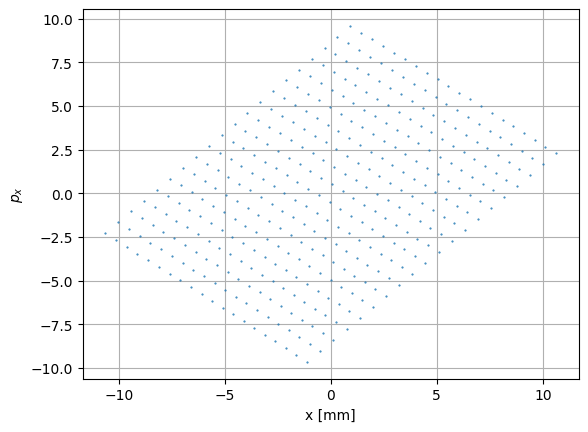

In [74]:
plt.plot(data['x'][:, -1] * 1000, data['px'][:, -1] * 1000, '.', markersize=1, color='C0')
plt.grid()
plt.xlabel('x [mm]')
plt.ylabel(r'$p_x$')

In [16]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from models import GSympNet

In [17]:
# Hyperparameters
dim = 2
layers = 3
width = 20
activation = torch.sigmoid
epochs = 1000
batch_size = 64
learning_rate = 1e-3

In [52]:
# x_xp_data_list = [np.array([data['x'][i, :], data['px'][i, :]]).T for i in range(data['x'].shape[0])]
x_xp_data_list = [np.array([data['x'][i, :], data['px'][i, :]]).T for i in range(300)]
x_xp_data = np.vstack(x_xp_data_list)

In [53]:
x_xp_data.shape

(5100, 2)

In [54]:
x_xp_data.shape

(5100, 2)

In [55]:
input, output = x_xp_data[:-1], x_xp_data[1:]

In [56]:
train_x = torch.tensor(input, dtype=torch.float32)
train_y = torch.tensor(output, dtype=torch.float32)

In [57]:
train_x.shape

torch.Size([5099, 2])

In [58]:
train_x_dummy = torch.randn(1000, dim)

In [59]:
train_x_dummy.shape

torch.Size([1000, 2])

In [60]:
dataset = TensorDataset(train_x, train_y)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [61]:
model = GSympNet(dim, layers, width, activation)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()

In [62]:
model.train()
for epoch in range(epochs):
    total_loss = 0.0
    for x_batch, y_batch in loader:
        optimizer.zero_grad()
        pred = model(x_batch)
        loss = criterion(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x_batch.size(0)
    avg_loss = total_loss / len(dataset)    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.6f}")

Epoch 1/1000, Loss: 0.000016
Epoch 2/1000, Loss: 0.000016
Epoch 3/1000, Loss: 0.000016
Epoch 4/1000, Loss: 0.000016
Epoch 5/1000, Loss: 0.000016
Epoch 6/1000, Loss: 0.000016
Epoch 7/1000, Loss: 0.000016
Epoch 8/1000, Loss: 0.000016
Epoch 9/1000, Loss: 0.000016
Epoch 10/1000, Loss: 0.000016
Epoch 11/1000, Loss: 0.000016
Epoch 12/1000, Loss: 0.000016
Epoch 13/1000, Loss: 0.000016
Epoch 14/1000, Loss: 0.000016
Epoch 15/1000, Loss: 0.000016
Epoch 16/1000, Loss: 0.000016
Epoch 17/1000, Loss: 0.000016
Epoch 18/1000, Loss: 0.000016
Epoch 19/1000, Loss: 0.000016
Epoch 20/1000, Loss: 0.000016
Epoch 21/1000, Loss: 0.000016
Epoch 22/1000, Loss: 0.000016
Epoch 23/1000, Loss: 0.000016
Epoch 24/1000, Loss: 0.000016
Epoch 25/1000, Loss: 0.000016
Epoch 26/1000, Loss: 0.000016
Epoch 27/1000, Loss: 0.000016
Epoch 28/1000, Loss: 0.000016
Epoch 29/1000, Loss: 0.000016
Epoch 30/1000, Loss: 0.000016
Epoch 31/1000, Loss: 0.000016
Epoch 32/1000, Loss: 0.000016
Epoch 33/1000, Loss: 0.000016
Epoch 34/1000, Loss

In [67]:
x_test_list = [np.array(data['x'][i, :]).T for i in range(300, 400)]
x_test = np.vstack(x_test_list)

In [75]:
x_test.shape

(100, 17)

In [78]:
test_x = torch.tensor(x_test, dtype=torch.float32)

In [87]:
test_x = torch.tensor(np.array([data['x'][300,0], data['px'][300, 0]]).T, dtype=torch.float32)

In [88]:
test_x.shape

torch.Size([2])

In [ ]:
pred = model.predict(test_x, 17)

tensor([[-0.0100,  0.0028],
        [-0.0100,  0.0027],
        [-0.0100,  0.0027],
        [-0.0100,  0.0026],
        [-0.0100,  0.0025],
        [-0.0101,  0.0025],
        [-0.0101,  0.0024],
        [-0.0101,  0.0023],
        [-0.0101,  0.0022],
        [-0.0101,  0.0022],
        [-0.0101,  0.0021],
        [-0.0101,  0.0020],
        [-0.0101,  0.0020],
        [-0.0101,  0.0019],
        [-0.0101,  0.0018],
        [-0.0101,  0.0017],
        [-0.0102,  0.0017]], grad_fn=<ViewBackward0>)

In [92]:
true = np.array([data['x'][300,1:], data['px'][300, 1:]]).T

In [101]:
pred.detach().numpy().shape - true

array([[43.00908791,  1.99681873],
       [43.00590664,  1.99681873],
       [42.99393332,  1.99691235],
       [42.99084567,  1.99691235],
       [42.98961974,  1.99487192],
       [42.98449166,  1.99487192],
       [42.99026926,  2.0081333 ],
       [42.99840255,  2.0081333 ],
       [43.00084607,  2.00814458],
       [43.00899064,  2.00814458],
       [43.01557586,  1.99532568],
       [43.01090154,  1.99532568],
       [43.00982968,  1.9974911 ],
       [43.00732078,  1.9974911 ],
       [42.99522236,  1.99617   ],
       [42.99139236,  1.99617   ]])